# Project Title: Uber Rides and weather

### Team: Pablo Crespo, Victoria Wise, Trushil Patel, Steve Moss (Group 5)

## Project Description: 

#    - If weather plays an impact on Uber Rides in New York 
    
### Research Questions: 

1)  What are some findings on the commuter habits   

2)  Does weather impact on number of Uber Rides request  

3)  Time of the day that has the most Uber Rides request 

4)  Time of the week that has the most Uber Rides request

### Importing libraries and dependencies

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import seaborn as sns
import os
import datetime

# Import API key
from weather_api import weather_api_key

### Weather API
Requesting data through the Historical World Weather API or reading a file with the data if the request was previously made.

In [2]:
# Set 'call_api = True' for the first time to create the file weather_data.csv that includes
# weather information obtained from the Historical World Weather API.

# Set 'call_api = False' if file weather_data.csv already exists.

call_api = True

if call_api:
    %run api_call.ipynb
else:
    try:
        weather_data = pd.read_csv("Data/weather_data.csv", encoding = "utf-8")
        print("File 'weather_data.csv' read in variable 'weather_data'")
    except FileNotFoundError:
        print("File 'weather_data.csv' was not found.")
        print("Set 'call_api = True' to call Weather API and create weather_data.csv")
    

Retrieving weather information from 2014-07-01 00:00:00 to 2014-10-01 00:00:00.

<Response [200]>: COMPLETE ---> 2014-07-01
<Response [200]>: COMPLETE ---> 2014-07-02
<Response [200]>: COMPLETE ---> 2014-07-03
<Response [200]>: COMPLETE ---> 2014-07-04
<Response [200]>: COMPLETE ---> 2014-07-05
<Response [200]>: COMPLETE ---> 2014-07-06
<Response [200]>: COMPLETE ---> 2014-07-07
<Response [200]>: COMPLETE ---> 2014-07-08
<Response [200]>: COMPLETE ---> 2014-07-09
<Response [200]>: COMPLETE ---> 2014-07-10
<Response [200]>: COMPLETE ---> 2014-07-11
<Response [200]>: COMPLETE ---> 2014-07-12
<Response [200]>: COMPLETE ---> 2014-07-13
<Response [200]>: COMPLETE ---> 2014-07-14
<Response [200]>: COMPLETE ---> 2014-07-15
<Response [200]>: COMPLETE ---> 2014-07-16
<Response [200]>: COMPLETE ---> 2014-07-17
<Response [200]>: COMPLETE ---> 2014-07-18
<Response [200]>: COMPLETE ---> 2014-07-19
<Response [200]>: COMPLETE ---> 2014-07-20
<Response [200]>: COMPLETE ---> 2014-07-21
<Response [200]>

### Cleaning and merging

Cleaning rides data and merging with weather data or reading files with data already cleaned and merged if the code was previously executed.

In [3]:
# Set 'call_rides_cleaning = True' for the first time to create the files weather_rides_df.csv
# and weekday_df.csv that include merged data of weather and rides by date and by weekday.

# Set 'call_rides_cleaning = False' if files weather_rides_df.csv
# and weekday_df.csv already exist.

call_rides_cleaning = True

if call_rides_cleaning:
    %run rides_cleansing.ipynb
else:
    try:
        merged_df = pd.read_csv("Data/rides_data.csv", encoding = "utf-8")
        weather_rides = pd.read_csv("Data/weather_rides_df.csv", encoding = "utf-8")
        weekday_df = pd.read_csv("Data/weekday_df.csv", encoding = "utf-8")
        print("File 'rides_data.csv' read in variable 'merged_df'")
        print("File 'weather_rides_df.csv' read in variable 'weather_rides'")
        print("File 'weekday_df.csv' read in variable 'weekday_df'")
    except FileNotFoundError:
        print("Files 'rides_data.csv', 'weather_rides_df.csv', and 'weekday_df.csv' missing.")
        print("Set 'call_rides_cleaning = True' to generate them.")

GOOD | FILE: other-American_B01362 | ENCODING: utf-8
GOOD | FILE: other-Carmel_B00256 | ENCODING: cp1252
GOOD | FILE: other-Diplo_B01196 | ENCODING: cp1252
GOOD | FILE: other-Federal_02216 | ENCODING: utf-8
GOOD | FILE: other-Firstclass_B01536 | ENCODING: cp1252
GOOD | FILE: other-Highclass_B01717 | ENCODING: cp1252
GOOD | FILE: other-Prestige_B01338 | ENCODING: cp1252
GOOD | FILE: other-Skyline_B00111 | ENCODING: utf-8
GOOD | FILE: uber-raw-data-jul14 | ENCODING: utf-8
GOOD | FILE: uber-raw-data-aug14 | ENCODING: utf-8
GOOD | FILE: uber-raw-data-sep14 | ENCODING: utf-8


 SUCCESS!!! Script run until completion.

 Files 'rides_data.csv', 'weather_rides_df.csv', and 'weekday_df.csv' created and saved in folder 'Data'


### Plotting

The mean daily max temperature is 26.032608695652176
The median daily max temperature is 26.0
The highest daily max temperature is 31.0
The lowest daily max temperature is 15.0
The mean daily  rain is 4.657608695652175
The median daily rain is 0.6499999999999999
The highest daily rain is 57.6
The lowest daily rain is 0.0
The mean daily  humidity is 76.58695652173913
The median daily humidity is 76.0
The highest daily humidity is 92.0
The lowest daily humidity is 62.0
The mean daily  uvIndex is 5.576086956521739
The median daily uvIndex is 6.0
The highest daily uvIndex is 7.0
The lowest daily uvIndex is 3.0
The mean daily  cloudcover is 26.0
The median daily cloudcover is 22.5
The highest daily cloudcover is 85.0
The lowest daily cloudcover is 0.0
The mean daily # of Uber rides 28842.739130434784
The mean daily # of all rides 42039.34782608696
The highest daily number of Uber rides is 43205
The lowest daily number of Uber rides is 10890


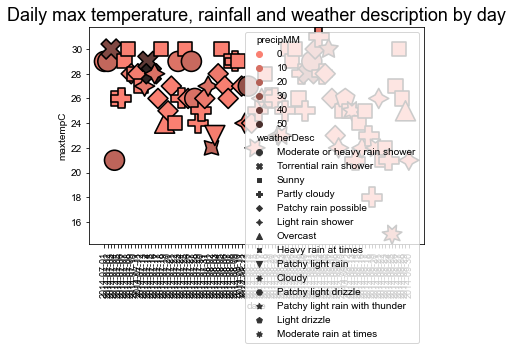

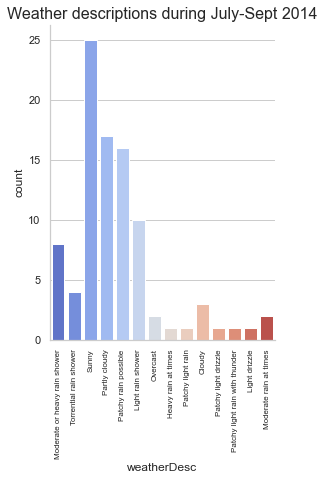

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


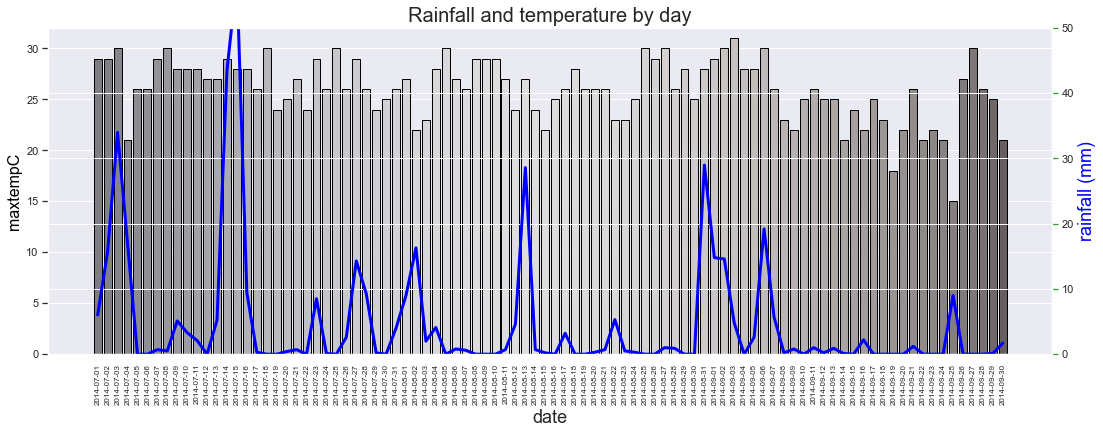

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


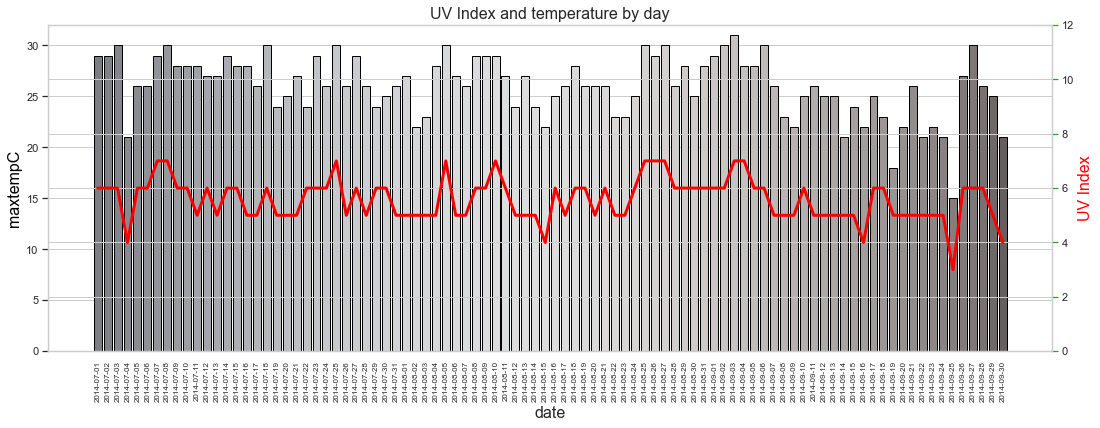

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


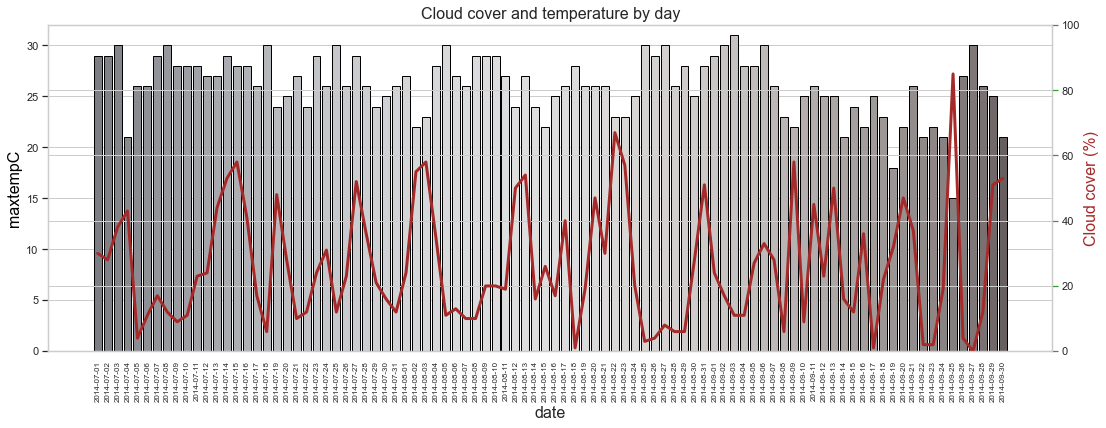

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


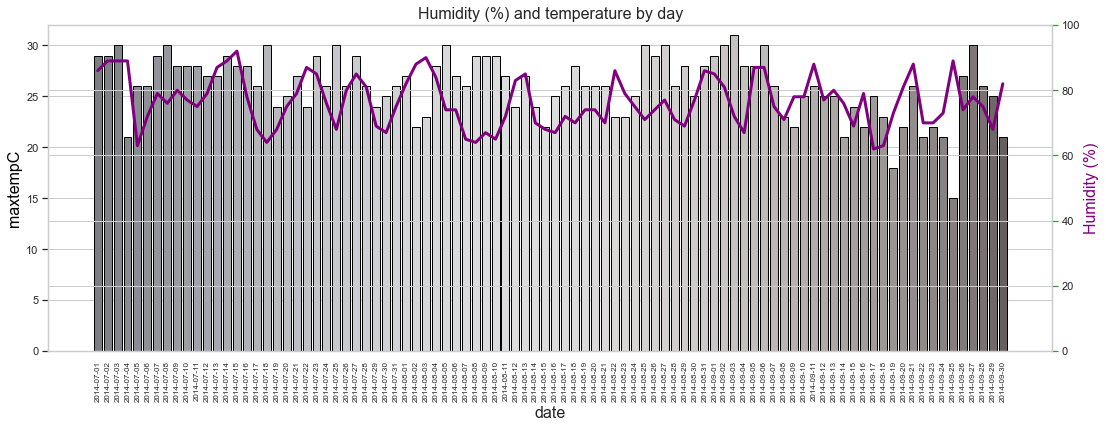

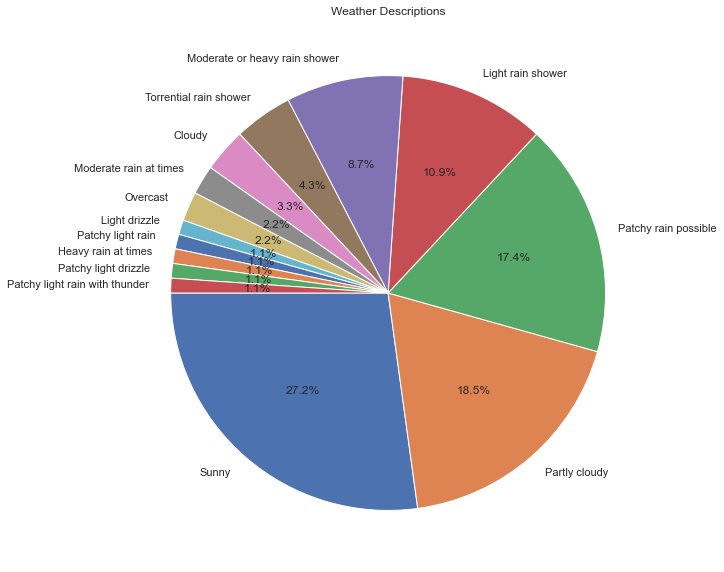

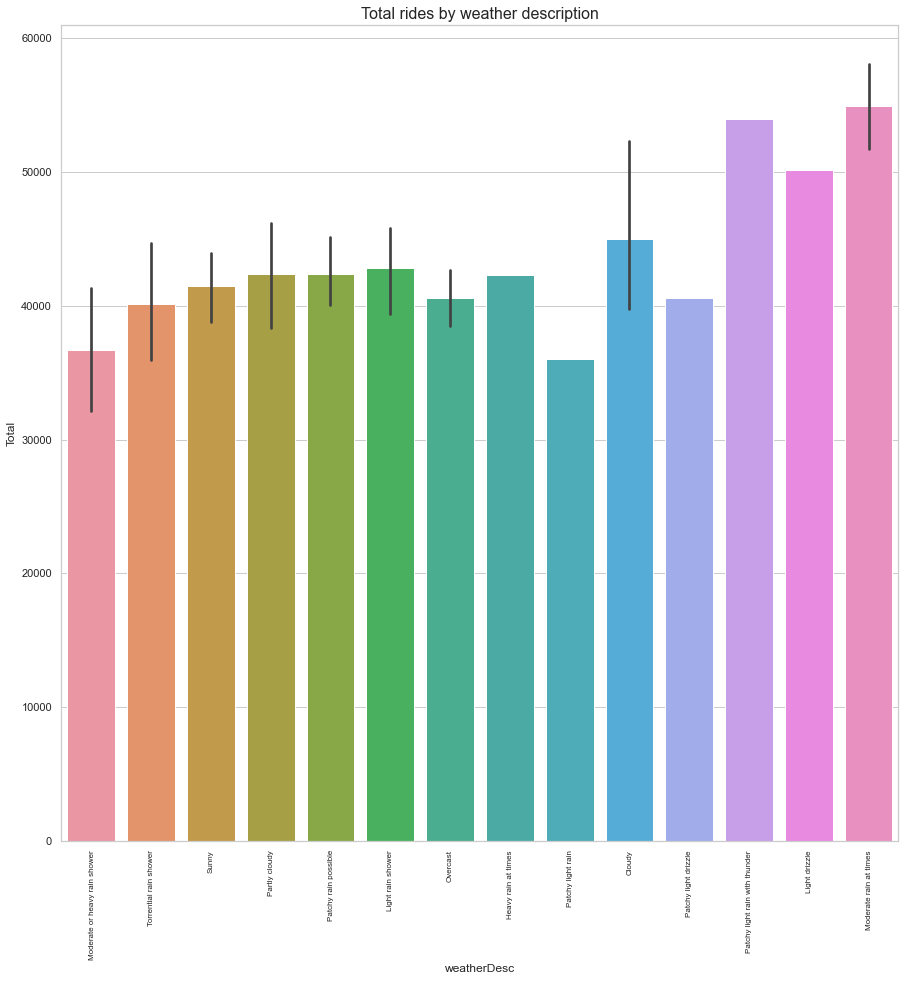

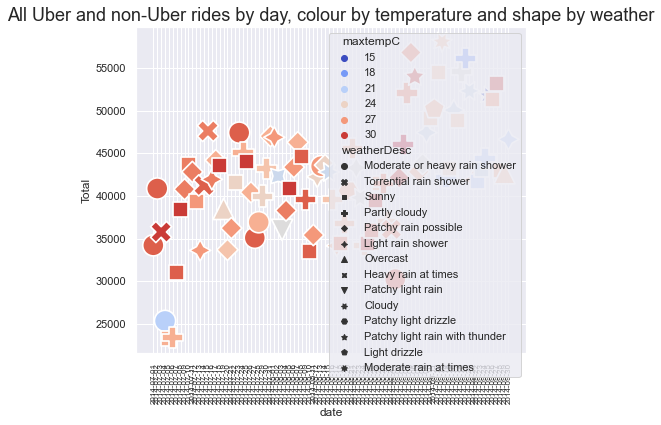

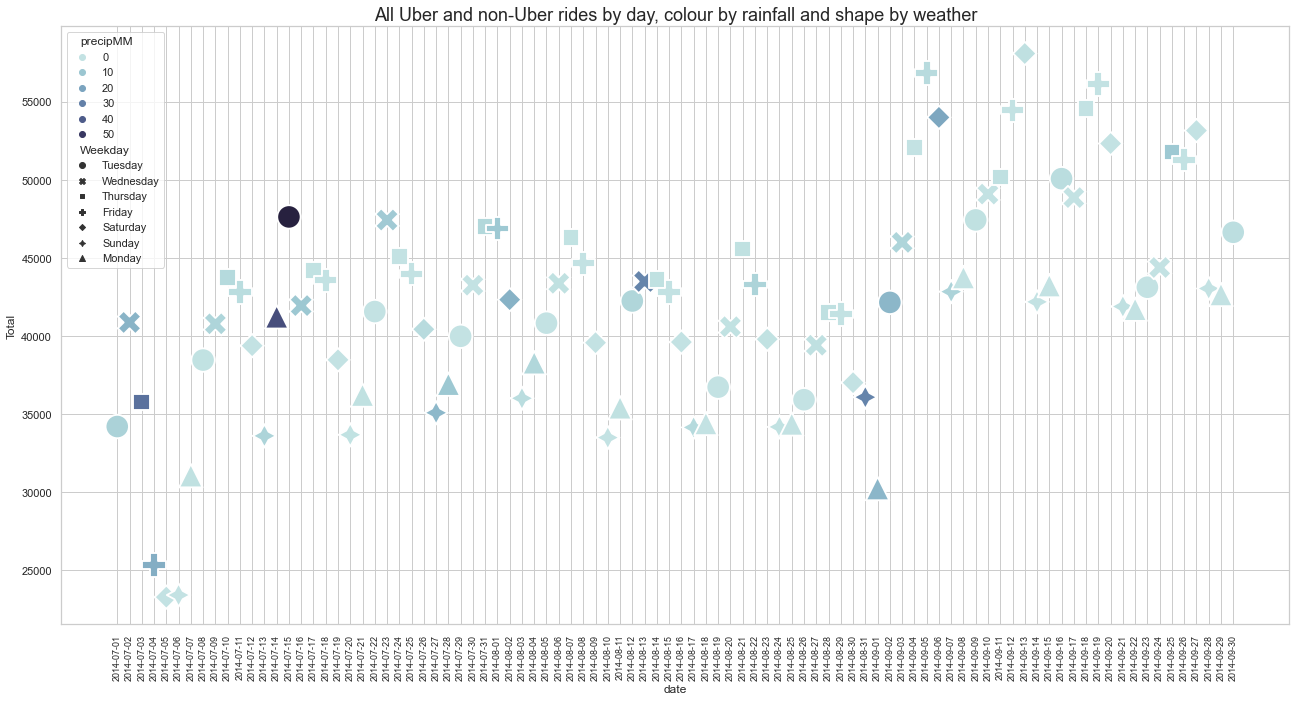

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


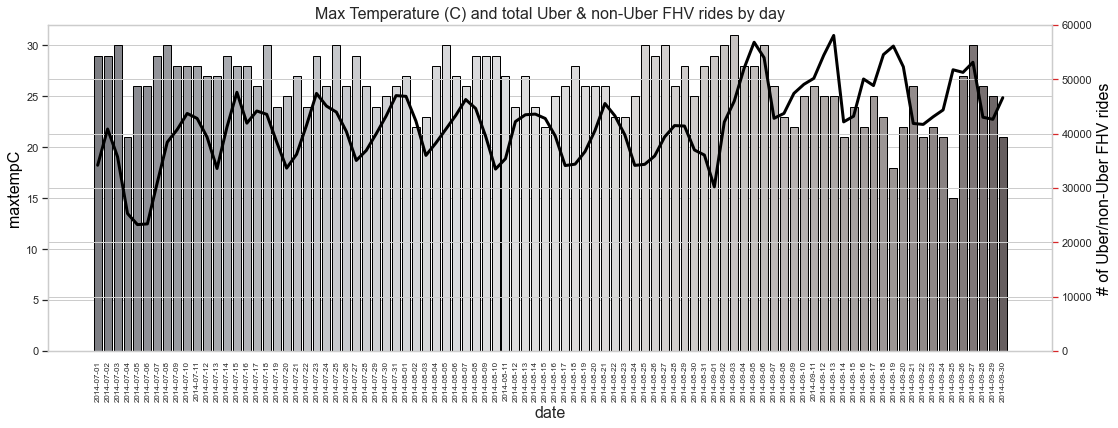

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


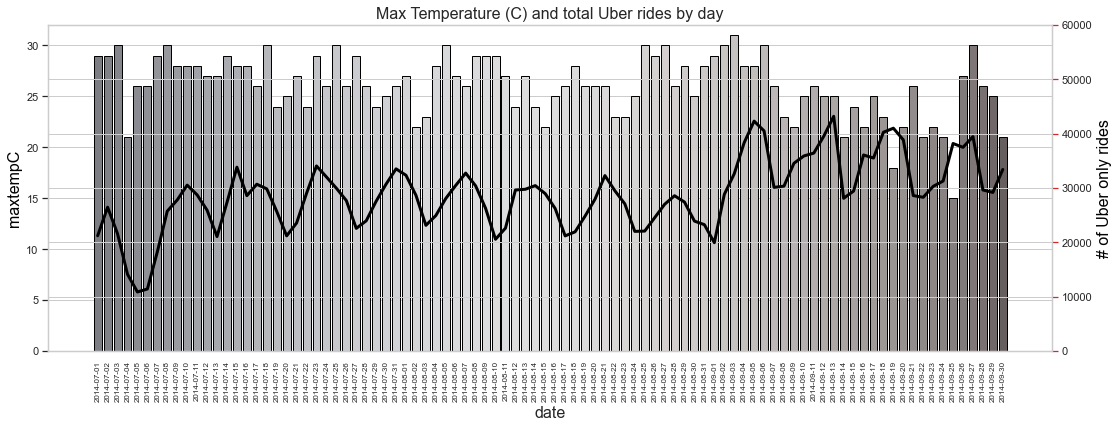

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


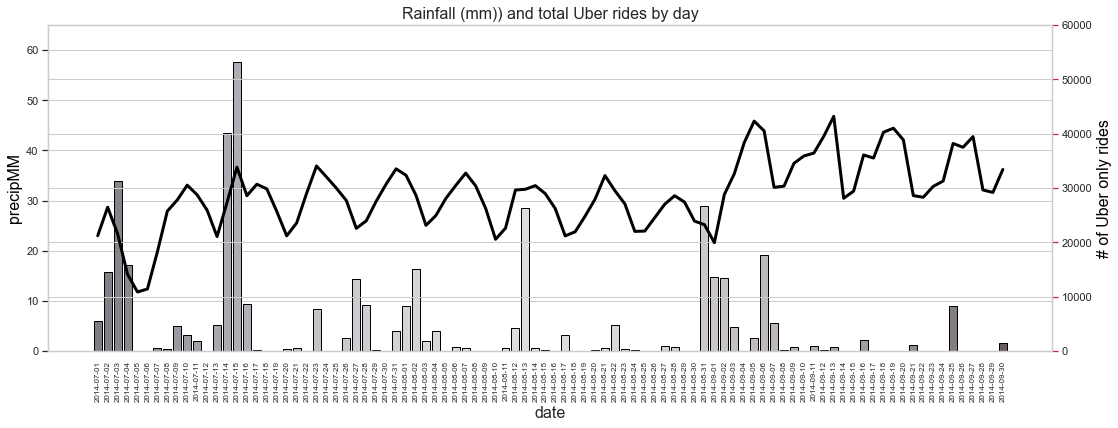

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


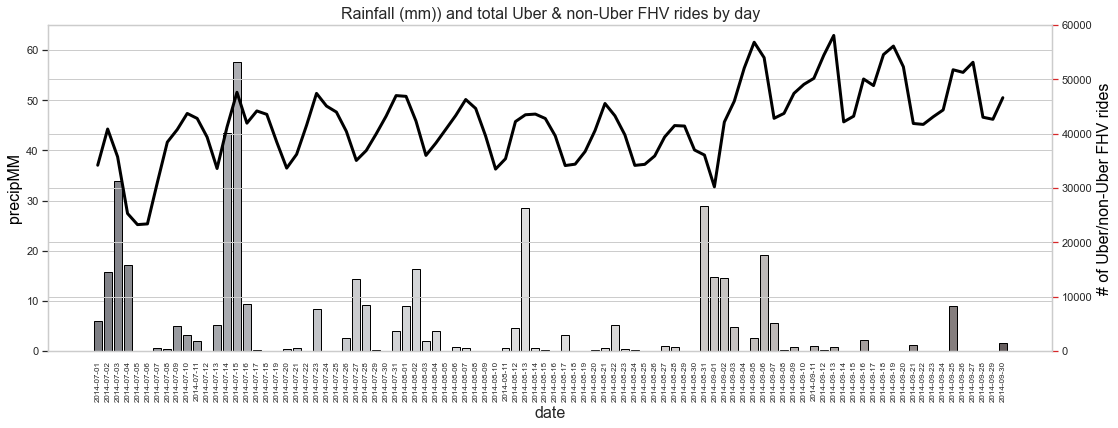

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


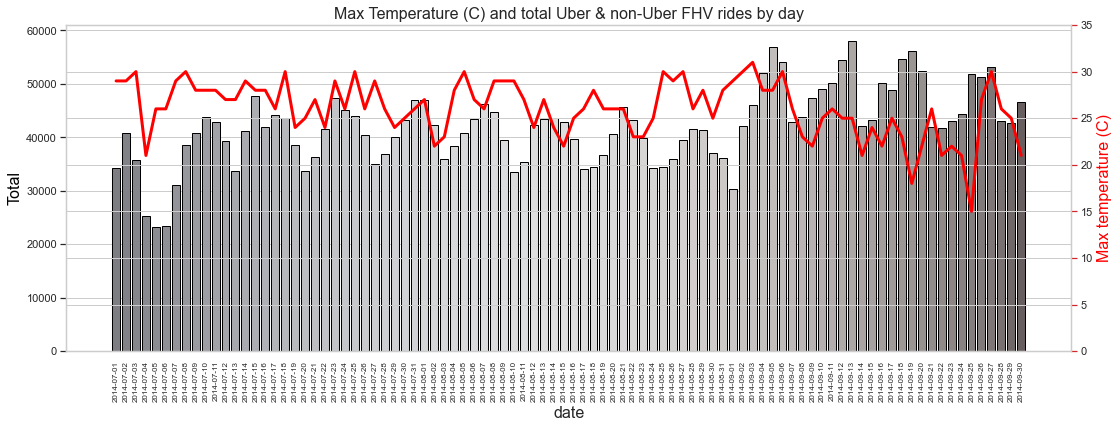

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


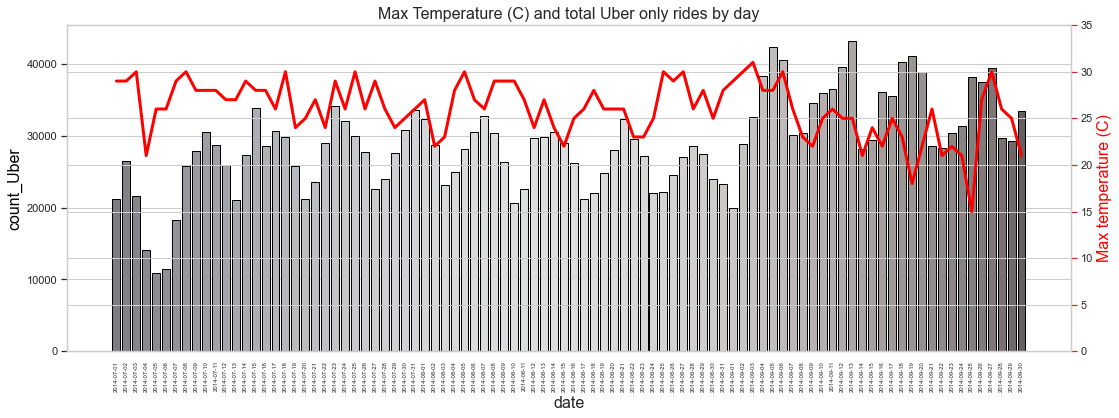

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


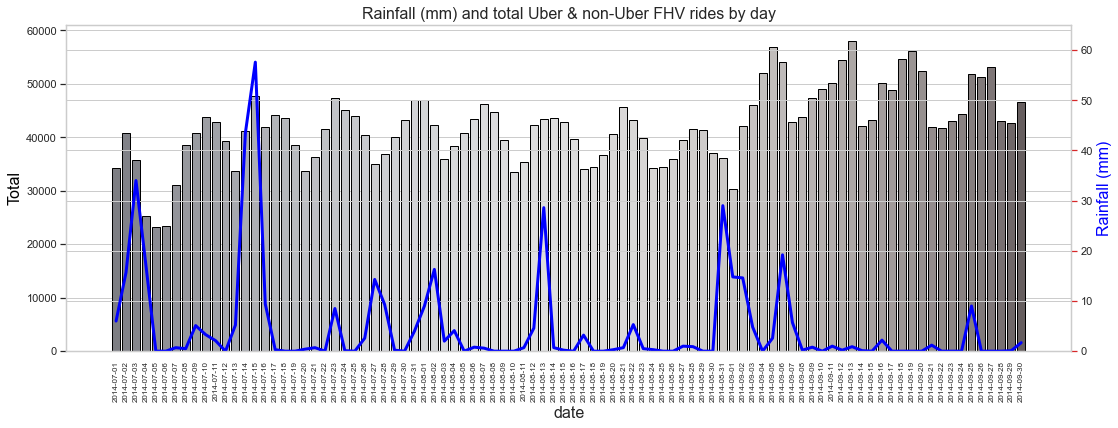

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


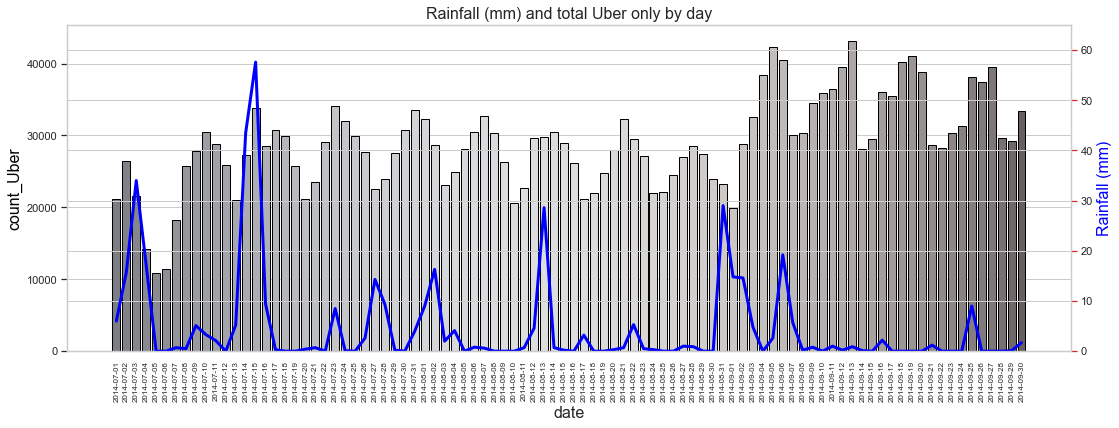

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


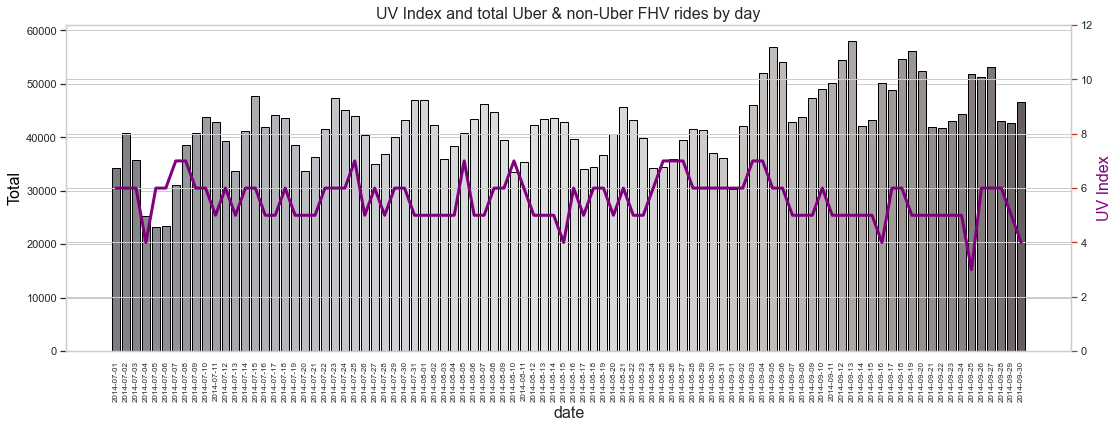

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


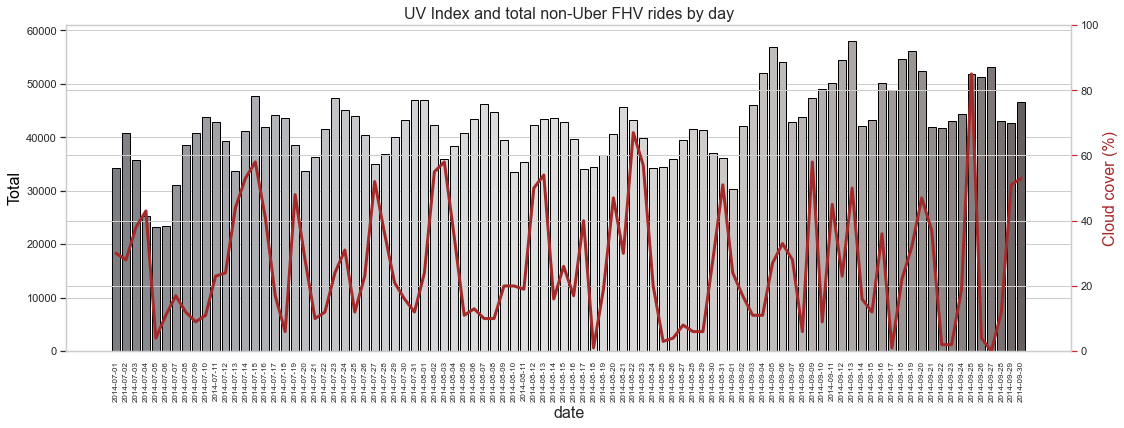

Plots.ipynb:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  "metadata": {},


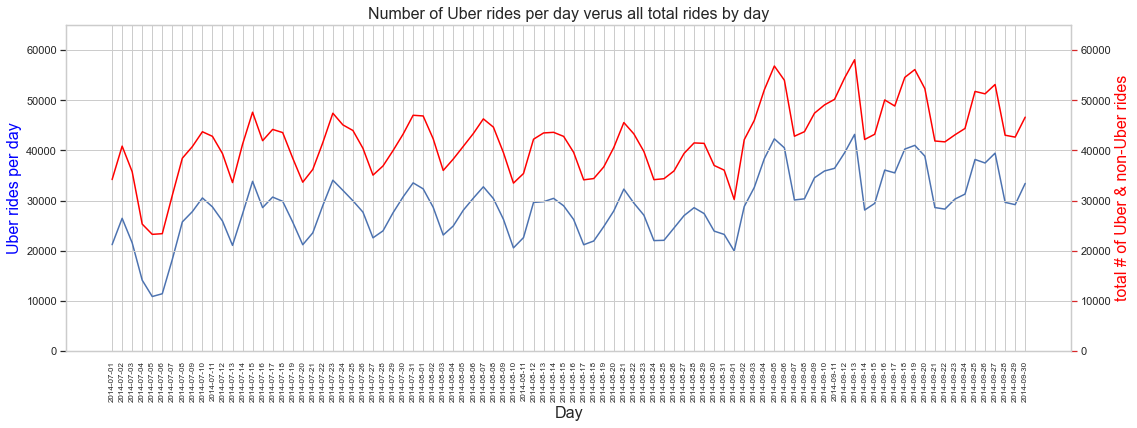

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


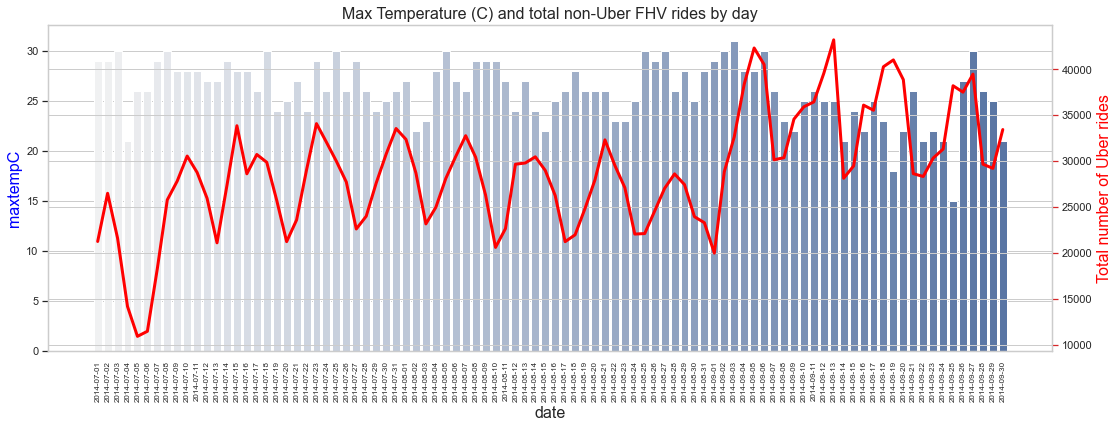

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


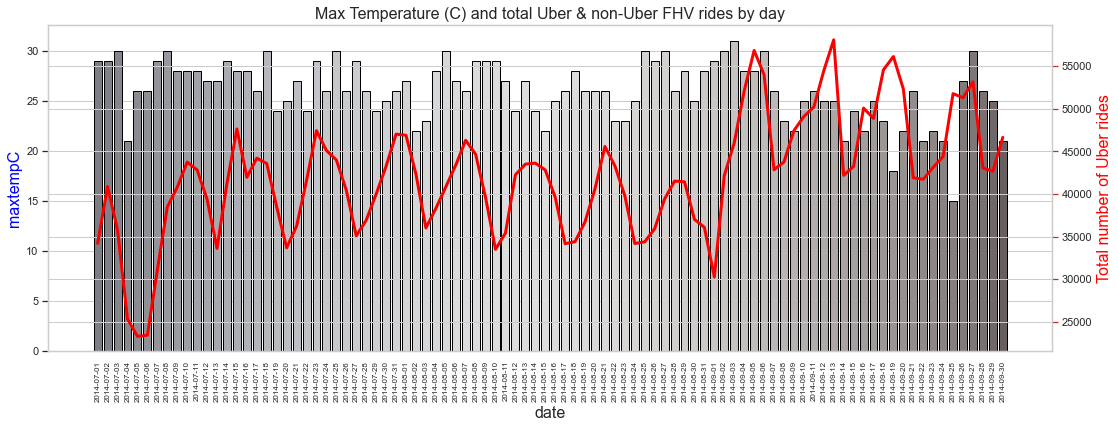

Plots.ipynb:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  "id": "84002a4b",


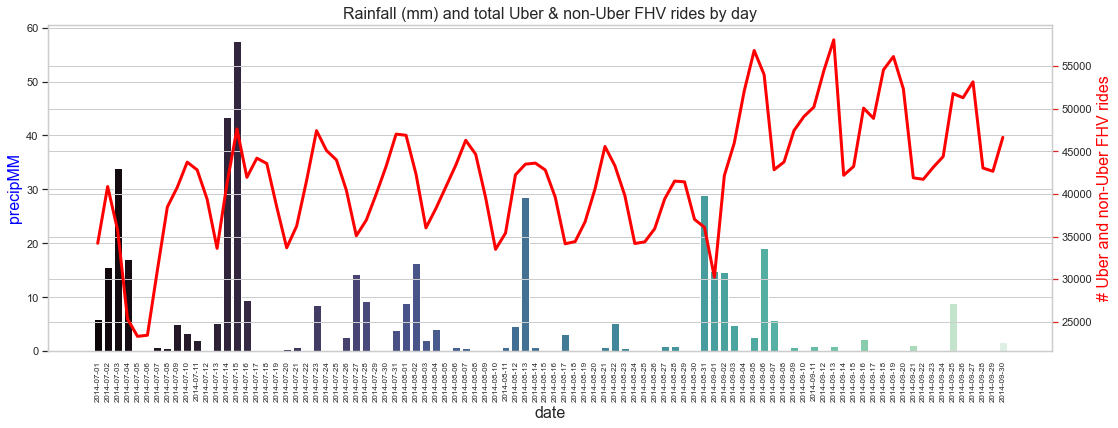

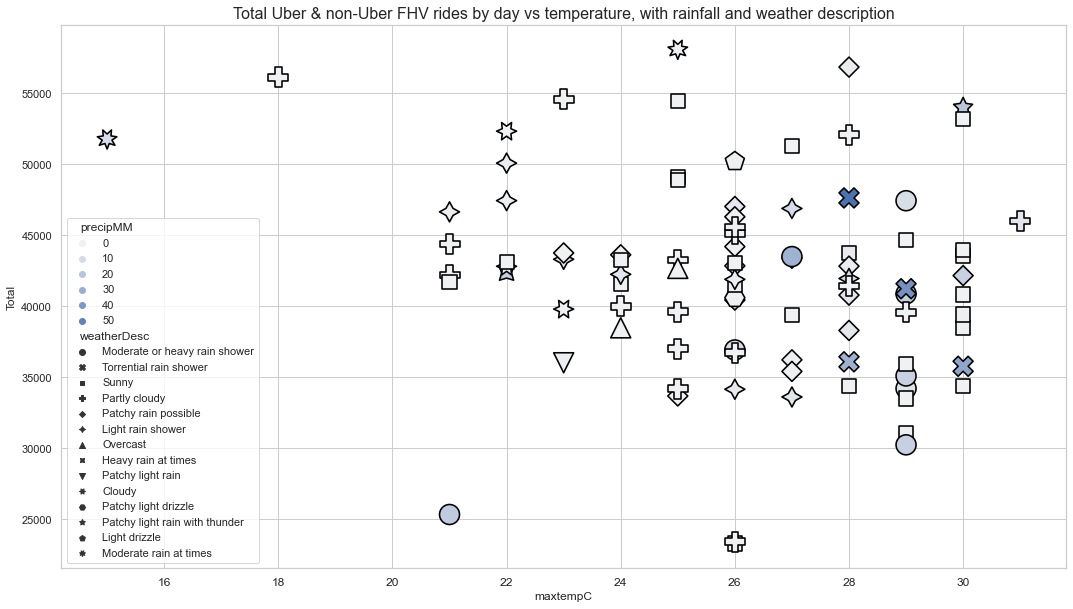

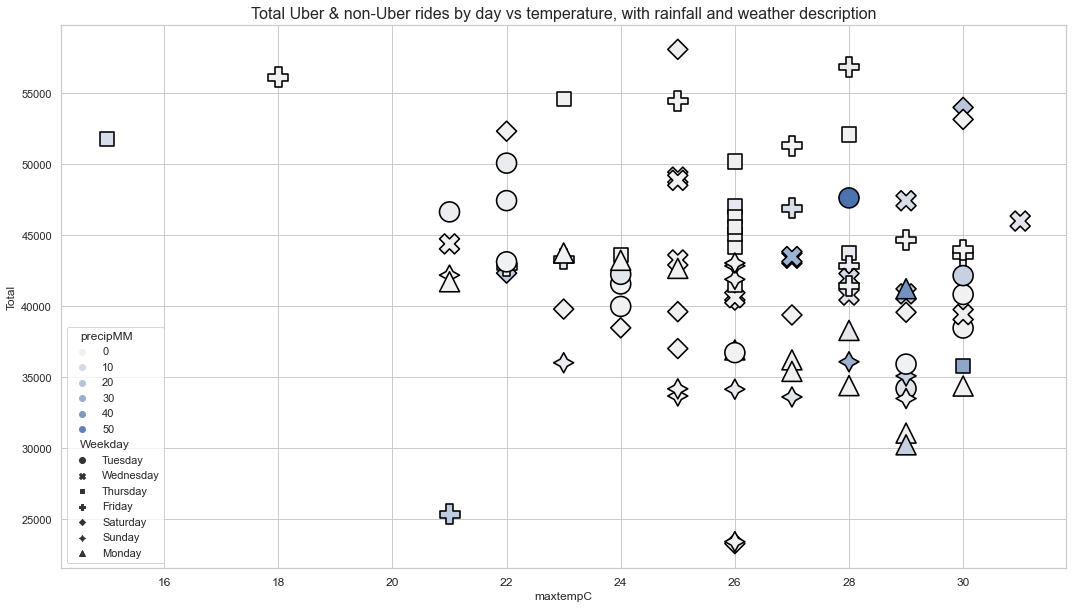

The r correlation coefficient of max temp and total rides is r=0.996
The r correlation coefficient of max temp and total rides is r=-0.209
The r correlation coefficient of max temp and total Uber only rides is r=-0.215
The r correlation coefficient of humidity and total rides is r=0.008
The r correlation coefficient of rainfall and total rides is r=-0.049
The r correlation coefficient of UV Index and total rides is r=-0.182
The r correlation coefficient of cloud cover and total rides is r=0.088


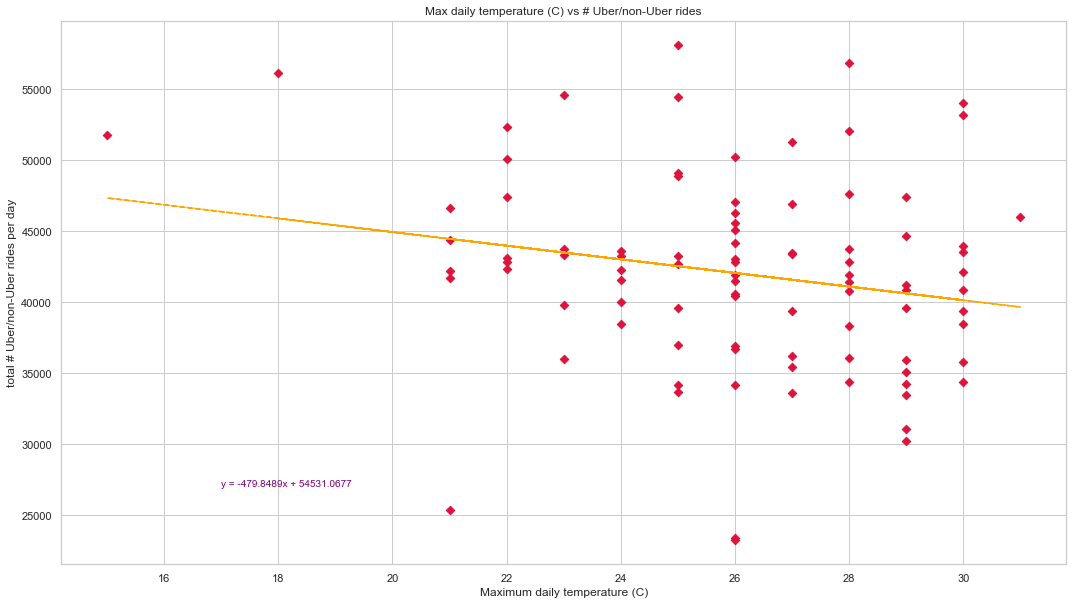

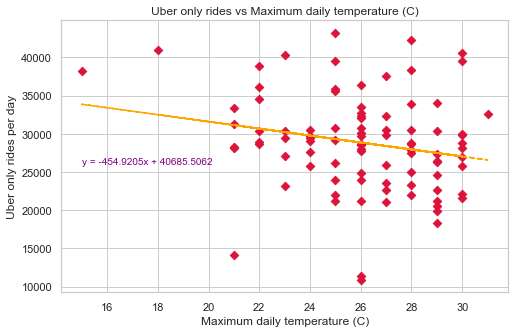

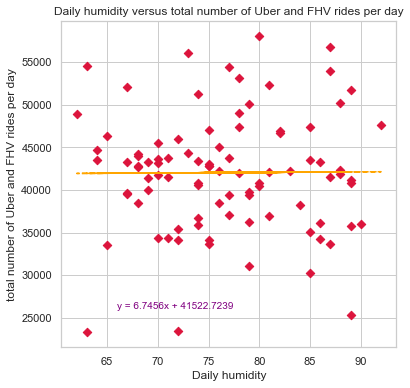

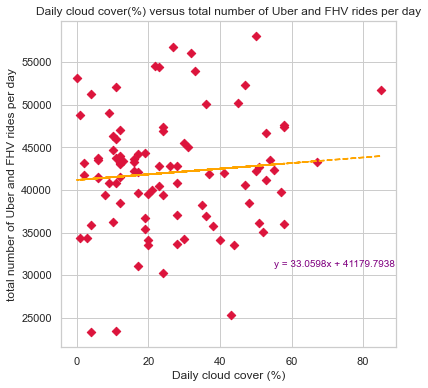

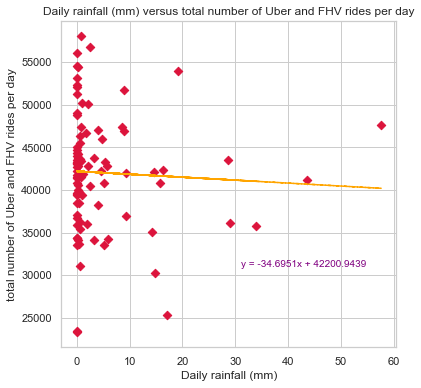

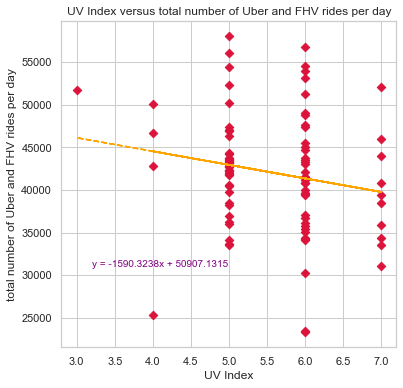

Script run until completion


In [4]:
%run Plots.ipynb